# Data Visualization and Explanation
---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from IPython.display import display
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

## Set the style

In [2]:
plt.style.use('seaborn')

Data cleaning steps
---
1. Renamed columns names of dataset.
2. Replaced Master's and phd's to Graduate in year columns.
3. Fill missing values in cofidence column to 3.
4. Make sure students' current units are correct, some values were more than 100.
5. Fill missing values in student's current units columns to 0.
6. Fill GPA columns with the average GPA.

In [17]:
data_df = pd.read_csv("data_cleaned.csv")
data_df

,helping_others_confidence,study_group_yesno,feel_confidence,feel_confidence2,study_group_preference,education_fulfillment,curr_class,curr_units,approx_gpa_year1,approx_gpa_win22_1,approx_gpa_win22_2,year,gender,age
0,3,Yes,1,3,Alone,3,CS105,12,3.50,3.9,3.43,Junior,Woman,21
1,5,No,3,4,Alone,4,CS111,14,3.90,3.75,3.81,Sophomore,Man,20
2,5,No,3,3,All the above,2,CS111,12,2.70,2.7,2.70,Sophomore,Man,19
3,4,Yes,4,4,In groups,4,CS105,17,3.90,3.9,3.90,Junior,Man,20
4,1,No,3,3,Alone,4,CS111,15,3.40,3.4,3.40,Junior,Man,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,3,No,3,3,Partner,4,CS111,17,3.50,2.85,3.22,Sophomore,Man,19
88,3,No,3,4,All the above,2,CS105,16,2.50,2.5,2.50,Junior,Man,21
89,3,Yes,2,4,Partner,5,CS105,16,4.00,3.9,3.97,Senior,Man,23
90,5,No,1,4,Alone,4,CS105,12,3.50,3,3.50,Junior,Man,Daneil


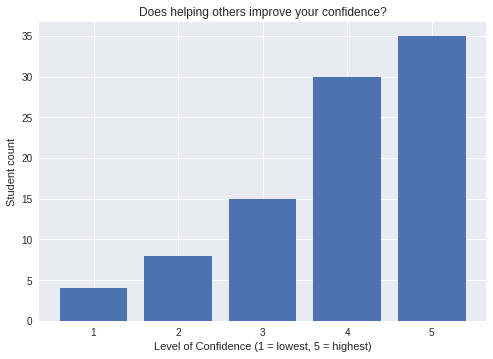

In [18]:
d1 = data_df["helping_others_confidence"]
d2 = d1.value_counts()
display(d2)
plt.title("Does helping others improve your confidence?")
plt.xlabel("Level of Confidence (1 = lowest, 5 = highest)")
plt.ylabel("Student count")
plt.bar(d2.index,d2)
plt.show()

3    29
4    27
2    24
1     8
5     4
Name: feel_confidence, dtype: int64

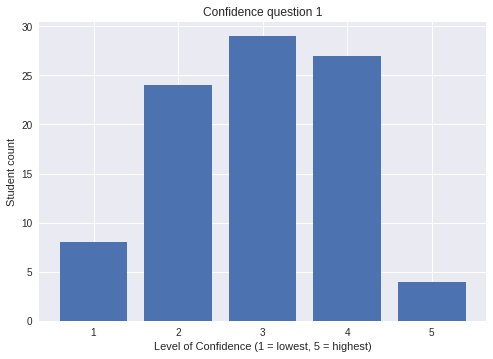

<AxesSubplot:xlabel='education_fulfillment'>

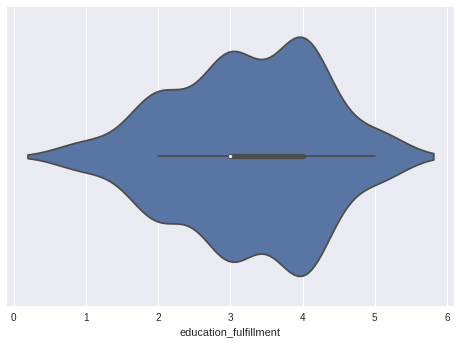

In [5]:
d1 = data_df["feel_confidence"]
d3 = d1.value_counts()
display(d3)
plt.bar(d3.index,d3)
plt.title("Confidence question 1")
plt.ylabel("Student count")
plt.xlabel("Level of Confidence (1 = lowest, 5 = highest)")
plt.show()

sns.violinplot(x = data_df["education_fulfillment"])

Alone            28
Partner          26
All the above    23
In groups        15
Name: study_group_preference, dtype: int64

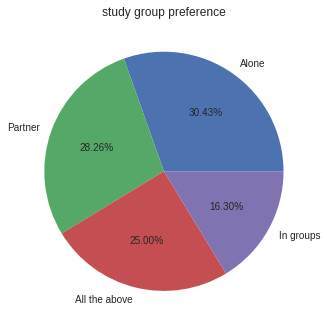

In [19]:
d1 = data_df["study_group_preference"]
d4 = d1.value_counts()
display(d4)
fig, ax = plt.subplots()
ax.set_title('study group preference')
d4.plot.pie(autopct='%.2f%%')
ax.get_yaxis().set_visible(False)

3    39
4    31
2    10
1     6
5     6
Name: feel_confidence2, dtype: int64

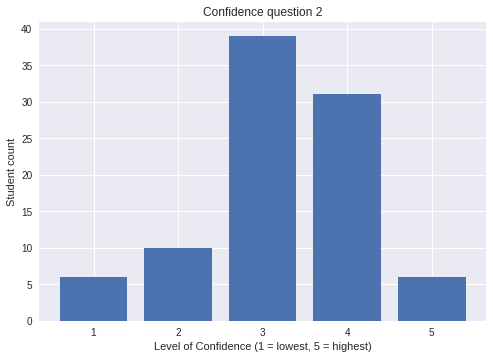

In [6]:
d1 = data_df["feel_confidence2"]
d3 = d1.value_counts()
display(d3)
plt.bar(d3.index,d3)
plt.title("Confidence question 2")
plt.ylabel("Student count")
plt.xlabel("Level of Confidence (1 = lowest, 5 = highest)")
plt.show()

Alone            28
Partner          26
All the above    23
In groups        15
Name: study_group_preference, dtype: int64

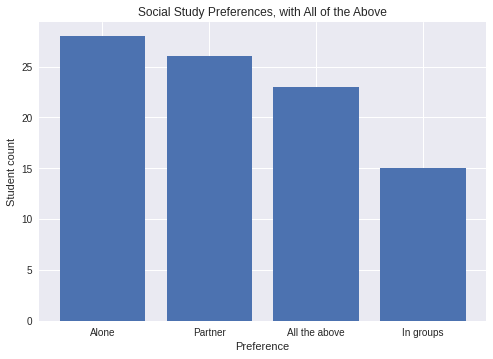

In [7]:
d1 = data_df["study_group_preference"]
d4 = d1.value_counts()
display(d4)
plt.bar(d4.index,d4)
plt.title("Social Study Preferences, with All of the Above")
plt.xlabel("Preference")
plt.ylabel("Student count")
plt.show()

Alone        28
Partner      26
In groups    15
Name: study_group_preference, dtype: int64

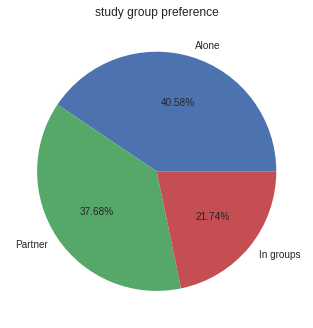

In [23]:
d1 = data_df["study_group_preference"][data_df["study_group_preference"] != "All the above"]
d4 = d1.value_counts()
display(d4)
fig, ax = plt.subplots()
ax.set_title('study group preference')
d4.plot.pie(autopct='%.2f%%')
ax.get_yaxis().set_visible(False)

study_group_preference,All the above,Alone,In groups,Partner
feel_confidence,,,,
1,1,6,0,1
2,4,5,6,9
3,12,6,4,7
4,5,8,5,9
5,1,3,0,0


Text(0.5, 1.0, 'Heat map showing percentages of confidences given study group preference')

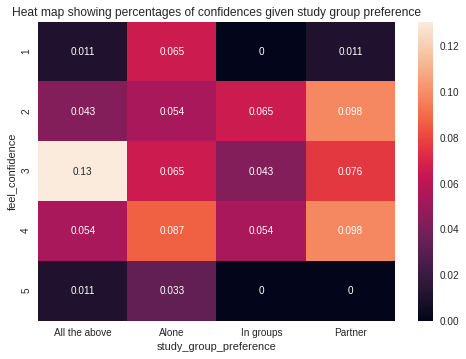

In [24]:
counts_1 = pd.crosstab(data_df.feel_confidence, data_df.study_group_preference)
display(counts_1)
joint = counts_1 / counts_1.sum().sum()
sns.heatmap(joint,annot = True)
plt.title("Heat map showing percentages of confidences given study group preference")


education_fulfillment,1,2,3,4,5
feel_confidence2,,,,,
1,1,3,1,1,0
2,2,4,2,1,1
3,1,6,18,13,1
4,0,5,7,15,4
5,0,0,1,4,1


<AxesSubplot:xlabel='education_fulfillment', ylabel='feel_confidence2'>

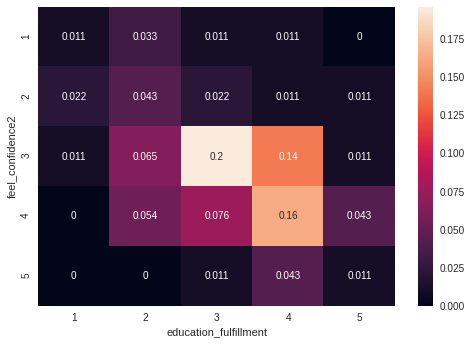

In [25]:
r = pd.crosstab(data_df.feel_confidence2, data_df.education_fulfillment)
display(r)
joint = r / r.sum().sum()
sns.heatmap(joint,annot=True)

study_group_preference,Alone,In groups,Partner
feel_confidence2,,,
1,2,2,1
2,5,3,1
3,10,3,15
4,7,7,9
5,4,0,0


<AxesSubplot:xlabel='study_group_preference', ylabel='feel_confidence2'>

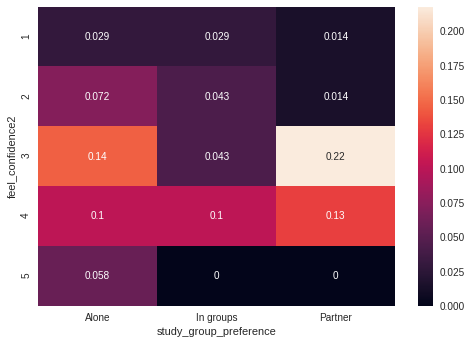

In [26]:
data_df = data_df[data_df["study_group_preference"] != "All the above"]
counts = pd.crosstab(data_df.feel_confidence2, data_df.study_group_preference)
display(counts)
joint = counts / counts.sum().sum()
sns.heatmap(joint,annot = True)

study_group_preference,All the above,Alone,In groups,Partner
feel_confidence,,,,
1,0.043478,0.214286,0.000000,0.038462
2,0.173913,0.178571,0.400000,0.346154
3,0.521739,0.214286,0.266667,0.269231
4,0.217391,0.285714,0.333333,0.346154
5,0.043478,0.107143,0.000000,0.000000


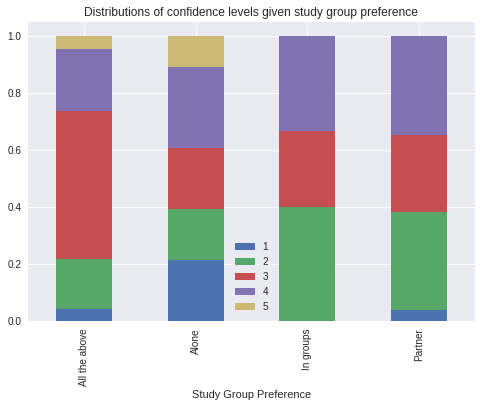

In [29]:
groupPreference_counts = counts_1.sum(axis=0)
confidence_given_groupPreference = counts_1.divide(groupPreference_counts, axis=1)
display(confidence_given_groupPreference)
confidence_given_groupPreference.T.plot.bar(stacked=True)
plt.title("Distributions of confidence levels given study group preference")
plt.xlabel("Study Group Preference")
plt.legend(loc="best")
plt.show()

study_group_preference,All the above,Alone,In groups,Partner
feel_confidence,,,,
1,0.125000,0.750000,0.000000,0.125000
2,0.166667,0.208333,0.250000,0.375000
3,0.413793,0.206897,0.137931,0.241379
4,0.185185,0.296296,0.185185,0.333333
5,0.250000,0.750000,0.000000,0.000000


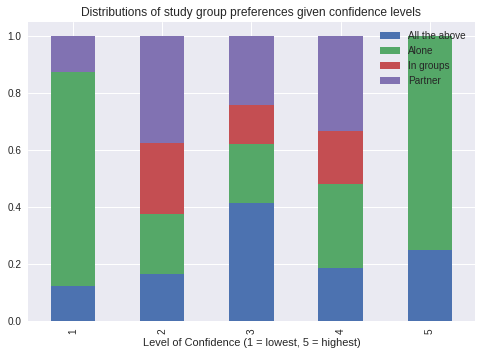

In [11]:
confidence_counts = counts_1.sum(axis=1)
groupPreference_given_confidence = counts_1.divide(confidence_counts, axis=0)
display(groupPreference_given_confidence)
groupPreference_given_confidence.plot.bar(stacked=True)
plt.title("Distributions of study group preferences given confidence levels")
plt.xlabel("Level of Confidence (1 = lowest, 5 = highest)")
plt.legend(loc="best")
plt.show()

In [12]:
print("Running chi square with All the above column")
chi_with, p, dfree, expected = chi2_contingency(counts_1)
print("calculated chi square value:", chi_with)
print("degree of freedom:", dfree)

Running chi square with All the above column
calculated chi square value: 20.442507566932846
degree of freedom: 12


In [13]:
counts_2 = pd.crosstab(data_df[data_df["study_group_preference"] != "All the above"].feel_confidence,
                       data_df[data_df["study_group_preference"] != "All the above"].study_group_preference)

print("Running chi square without All the above column")
chi_witho, p, dfree, expected = chi2_contingency(counts_2)
print("calculated chi square value:", chi_witho)
print("degree of freedom:", dfree)

Running chi square without All the above column
calculated chi square value: 12.918184819382297
degree of freedom: 8


In [14]:
print(f"Needed chi square value, with All the above column: {chi2.ppf(1-0.05, 12)}")
print(f" - Achieved chi square value: {chi_with}")
print(f" - Success: {True if (chi_with >= chi2.ppf(1-0.05, 12)) else False}")
print(f"Needed chi square value, without All the above column: {chi2.ppf(1-0.05, 8)}")
print(f" - Achieved chi square value: {chi_witho}")
print(f" - Success: {True if (chi_witho >= chi2.ppf(1-0.05, 8)) else False}")

Needed chi square value, with All the above column: 21.02606981748307
 - Achieved chi square value: 20.442507566932846
 - Success: False
Needed chi square value, without All the above column: 15.50731305586545
 - Achieved chi square value: 12.918184819382297
 - Success: False


## Questions

#### 1. What data do you have?

1)	We have a bar chart showing student’s confidences in helping other students 
2)	We have two bar charts to test student’s statistics with their own confidence and their own grades in class.
3)	We have 2 histogram regarding to students’s study group preferences.
4)	We have 1 heat map and 2 stacked bar charts about the correlation between study group preferences and students’ confidence.

#### 2. What would you like to know?

We want to find out what are the correlations between working with others and students’ self-confidence in a class. 

#### 3. Explore the data

By exploring into the the bar chart, we see that the distributional feature is skewed left, there are 29 students rated 4 in confidence level and 34 students rated 5 in confidence level. We see that 63 out of 89 students, meaning around 71% of student think help other students will increase their level of confidence. 

In question 1, we asked students about how they feel about their own confidence in this class and the bar chart shows a symmetric shape, meaning majority of student have average confidence. Only four percents of students are very confident. 

In question 2, we asked student about how confident they feel about their grades in this class, there are 38 students rate for average and 29 student rated for more than average. The graph shows there are around 43% of students think they are average and only 7% of students think they are the highest. We can see that majority of students are average or above average but very feel student are very confident. 

By comparing the results for the first two questions, we can see that students are less confident about how they do in this class than how their grades are ranged within the class. 

The next two histograms show the distribution of student’s preferences in working projects, we gave four options to the student, alone, with a partner, in a group, or all. The first one shows the amount of student choose to work in groups only is the lowest, comparing to alone, partner, or all. After removing the “all” option in the second histogram, we see that majority of students prefer to work alone and only even quarter of students will prefer to work in groups. 

We used a heat map for the preferences to be show specific details about the correlation between the study group preferences and the students’ feelings of confidence.  The heat may shows that highest heat is student with level 4 confidence who are working with a partner, and working alone ranks second for level 4 confidence. We can see that 3.4% of students think they are very confident while working alone, and only 0% feel very confident while working in groups. In this case it means majority of students who are working with a partner feel confident and within people who feel very confident, most of them are working alone. At the same time, working in a group has the lowest distribution in level 1 confident, which shows that working in group decreases student’s chance to feel very unconfident. 

The first stacked bar chart illustrates the confidence level, and we can see that students we choose all of the above are distributed toward average confidence, and working in groups is either confident or not confident.
The second stacked bar chart illustrates the study group preferences. The bar chart informs us that student feel very confident will most likely to choose working alone, students who feel confident will likely to choose to work with a partner or work alone, students who have average confident will most likely to choose all of the above, and students who are not confident will likely to choose to work with a partner. Interestingly, we see that students who have lowest confident will most likely to choose work alone and not work with a group.


#### 4. Can you state any hypotheses or make some predictions? Which tests can you apply to verify your hypothesis?

---

*Null hypothesis:* the preference of students (whether they like to work together or alone), does not have an impact on their level of confidence in the given class.

*Alternative hypothesis:* the preference of students (whether they like to work together or alone), does have an impact on their level of confidence in the given class.

---

#### 5. Test your hypotheses

---

We tested our hypothesis using $\chi ^2$ analysis. The tests were separated into two parts: (1) including "All the above" submissions for the `study_preference` columns, and (2) excluding "All the above" submissions for the `study_preference` column.


##### Part 1

In part (1), our contingency table has 12 degrees of freedom. $r = 5$, and $c = 4$, so $DF = (r-1)(c-1) = 4 \cdot 3 = 12$. Following the table for $\chi ^2$ analysis, we find that in order to reject the null hypothesis at a 95% confidence level, we need to achieve a $\chi ^2$ value of 21.026. However, as we can see from the function `chi2_contingency()`, the resulting value was 18.43.

Therefore, since our $\chi ^2$ failed to reach the needed value for 12 degrees of freedom, at a 95% confidence level, we fail to reject the null hypothesis at 95% confidence, and conclude that the study preferences of students generally does not affect their level of confidence.


##### Part 2

In part (2), our contingency table has 8 degrees of freedom. Since we removed one of the columns ("All the above"), we now have $r = 5$, and $c = 3$, and thus $DF = (r - 1)(c - 1) = 4 \cdot 2 = 8$. Following the same table as in Part 1, we found that we needed a $\chi ^2$ value of 15.507 in order to reject the null hypothesis. However, as we can see from the function `chi2_contingency()`, the resulting value was 11.117.

Therefore, since our $\chi ^2$ failed to reach the needed value for 8 degrees of freedom, at a 95% confidence level, we fail to reject the null hypothesis at 95% confidence, and conclude that the study preferences of students generally does not affect their level of confidence.

---